## Import Library

In [1]:
# Common imports
import os
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# TensorFlow imports
# may differs from version to versions

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Dataset information

image_folder = os.path.join('Dataset', 'train')
img_height, img_width = 250, 250  # size of images
num_classes = 2  # Tedy - Unknown

print(image_folder)

Dataset\train


## Look at the data

In [3]:
dataset = keras.preprocessing.image_dataset_from_directory(
    image_folder,
    seed=42,
    image_size=(img_height, img_width),
    label_mode='categorical',
    shuffle=True)


Found 180 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['Tedy', 'Unknown']

In [5]:
# Helper function to get classname of the image
def get_classname(class_names, mask):
    '''
    Returns an element of the array 'class_names' with the index
    where the maximum value from the 'mask' array is located.
    Used to get classname with categorical labels.

    Parameters:
        class_names (array-like): Target array
        mask (array-like): Mask array, elements must be numbers
    Returns:
        One of the element from 'class_names'

    >>> get_classname(['first', 'second'], [0, 1])
    'second'
    >>> get_classname(['first', 'second', third], [1, 0, 0])
    'first'
    '''

    assert len(class_names) == len(
        mask), "The arrays must be of the same length"

    return class_names[np.array(mask).argmax(axis=0)]

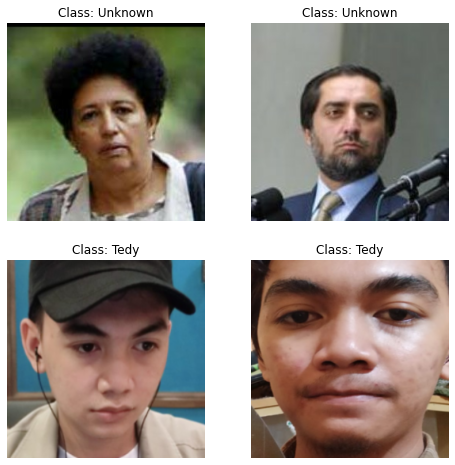

In [6]:
sqrt_img = 2  # images per row / col.
# The square root of the total number of images shown

plt.figure(figsize=(8, 8))
for images, labels in dataset.take(3):
    for index in range(sqrt_img**2):
        # grid 'sqrt_img' x 'sqrt_img'
        plt.subplot(sqrt_img, sqrt_img, index + 1)
        plt.imshow(images[index] / 255)
        class_name = get_classname(class_names, labels[index])
        plt.title("Class: {}".format(class_name))
        plt.axis("off")

## Data Augmentation

In [7]:
batch_size = 16

In [8]:
# Create data generator based on ImageDataGenerator object

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    image_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 180 images belonging to 2 classes.


(-0.5, 249.5, 249.5, -0.5)

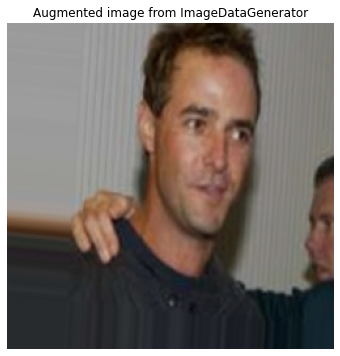

In [9]:
# To see next augmented image
image, label = train_generator.next()

plt.figure(figsize=(6, 6))
plt.imshow(image[0] / 255)  # first image from batch
plt.title("Augmented image from ImageDataGenerator")
plt.axis("off")

### Option 1 - Generate n * batch_size random samples

In [13]:
n = 10

aug_image_folder = os.path.join('Dataset', 'train_aug')
if not os.path.exists(aug_image_folder):
    os.makedirs(aug_image_folder)  # create folder if doesn't exist

# Note that the content of the folder is not deleted and files are added at every step

In [15]:
train_generator.save_to_dir = aug_image_folder
train_generator.save_format = 'jpg'

# If 'save_to_dir' is set, `next()` method
# will generate `batch_size` images each time 
# and save them to 'save_to_dir' folder

for i in range(n):
    print("Step {} of {}".format(i+1, n))
    train_generator.next()
    print("\tGenerate {} random images".format(train_generator.batch_size))

print("\nTotal number images generated = {}".format(n*train_generator.batch_size))

Step 1 of 10
	Generate 16 random images
Step 2 of 10
	Generate 16 random images
Step 3 of 10
	Generate 16 random images
Step 4 of 10
	Generate 16 random images
Step 5 of 10
	Generate 16 random images
Step 6 of 10
	Generate 16 random images
Step 7 of 10
	Generate 16 random images
Step 8 of 10
	Generate 16 random images
Step 9 of 10
	Generate 16 random images
Step 10 of 10
	Generate 16 random images

Total number images generated = 160


### Option 2 - Generate n samples for each image


In [10]:
n = 2

aug_image_folder = os.path.join('Dataset', 'train_aug')
if not os.path.exists(aug_image_folder):
    os.makedirs(aug_image_folder)  # create folder if doesn't exist

# Note that the content of the folder is not deleted and files are added at every step

In [11]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')

In [13]:
# classes: 'Tedy' and 'Unknown'
image_folder_to_generate = os.path.join(image_folder, 'Tedy')
image_folder_to_save = os.path.join(aug_image_folder, 'Tedy')
if not os.path.exists(image_folder_to_save):
    os.makedirs(image_folder_to_save)  # create folder if doesn't exist

i = 0
total = len(os.listdir(image_folder_to_generate))  # number of files in folder
for filename in os.listdir(image_folder_to_generate):
    print("Step {} of {}".format(i+1, total))
    # for each image in folder: read it
    image_path = os.path.join(image_folder_to_generate, filename)
    image = keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width, 3))
    image = keras.preprocessing.image.img_to_array(
        image)  # from image to array
    # shape from (250, 250, 3) to (1, 250, 250, 3)
    image = np.expand_dims(image, axis=0)

    # create ImageDataGenerator object for it
    current_image_gen = train_datagen.flow(image,
                                        batch_size=1,
                                        save_to_dir=image_folder_to_save,
                                        save_prefix=filename,
                                        save_format="jpg")

    # generate n samples
    count = 0
    for image in current_image_gen:  # accessing the object saves the image to disk
        count += 1
        if count == n:  # n images were generated
            break
    print('\tGenerate {} samples for file {}'.format(n, filename))
    i += 1

print("\nTotal number images generated = {}".format(n*total))

Step 1 of 90
	Generate 2 samples for file Screenshot_1.png
Step 2 of 90
	Generate 2 samples for file Screenshot_10.png
Step 3 of 90
	Generate 2 samples for file Screenshot_11.png
Step 4 of 90
	Generate 2 samples for file Screenshot_12.png
Step 5 of 90
	Generate 2 samples for file Screenshot_13.png
Step 6 of 90
	Generate 2 samples for file Screenshot_14.png
Step 7 of 90
	Generate 2 samples for file Screenshot_15.png
Step 8 of 90
	Generate 2 samples for file Screenshot_16.png
Step 9 of 90
	Generate 2 samples for file Screenshot_17.png
Step 10 of 90
	Generate 2 samples for file Screenshot_18.png
Step 11 of 90
	Generate 2 samples for file Screenshot_19.png
Step 12 of 90
	Generate 2 samples for file Screenshot_2.png
Step 13 of 90
	Generate 2 samples for file Screenshot_20.png
Step 14 of 90
	Generate 2 samples for file Screenshot_21.png
Step 15 of 90
	Generate 2 samples for file Screenshot_22.png
Step 16 of 90
	Generate 2 samples for file Screenshot_23.png
Step 17 of 90
	Generate 2 samples f